In [11]:
import sys
import deepwalk
import numpy as np

In [12]:
def check_method(method):
    val = None
    if method == "kmedoids" or method =="Kmedoids":
        val = "kmedoids"
    elif method =="kmeans" or method == "Kmeans":
        val = "kmeans"
    else:
        sys.exit(f"methodの値が無効です method : {method}")
    return val

In [13]:
def check_data(data):
    if data=="football" or data == "polbooks" or data=="karateclub":
        pass
    else:
    
        sys.exit(f"変数dataの値が無効です data : {data}")

In [17]:
#実行回数(埋め込み-クラスタリング-ARI)
TIME = 100

"""
data : 使用するデータ
football   : "football"
polbooks   : "polbooks"
karateclub : "karateclub"
"""
data = "karateclub"
check_data(data)

# インプットするファイル名
INPUT = deepwalk.generate_Graph(data)

#正解ラベル
TRUE_LABEL = deepwalk.get_label_list(data)

#インプットするグラフが無向グラフかどうか(True:無向グラフ,　False:有向グラフ)
UNDIRECTED = True




# １ノードあたりの実行数
NUMBER_WALKS =10

# 1ウォークあたりの長さ
WALK_LENGTH = 10

# skipgramので使われるウィンドウサイズ
WINDOW_SIZE = 4





# ランダムシード値
SEED = 0

# 埋め込み後の各ノードの次元数
REPRESENTATION_SIZE = 2

# 並列プロセス数
WORKERS = 1

#クラスタ数
N_CLUSTER = 2

#クラスタリング手法
"""
kmedoids : "kmedoids"
kmeans   : "kmeans"
"""
METHOD = check_method("kmeans")

#結果を表示するかどうか
SHOW = False


"""
以下はパラメータを変更して連続で実行する際に使用
(for文でリストを与えて実行)
"""

# １ノードあたりの実行数
NUMBER_WALKS_LIST = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]

# 1ウォークあたりの長さ
WALK_LENGTH_LIST = [5]

# ウィンドウサイズリスト
WINDOW_SIZE_LIST = [1, 2, 3, 4, 5,6,7,8,9,10]


In [18]:
"""
    グラフ生成
    G = from_networkx(INPUT:networkxグラフインスタンス, 無効グラフかどうか:boolean)
    """
G = deepwalk.from_networkx(INPUT, True)
# ノード数出力
print("Number of nodes: {}".format(len(G.nodes())))

# ウォーク数算出(ノード数*1ノードあたりのウォーク数)と出力
num_walks = len(G.nodes()) * NUMBER_WALKS
print("Number of walks: {}".format(num_walks))

# データサイズ(ウォーク数*ウォークの長さ)の算出と出力
data_size = num_walks * WALK_LENGTH
print("Data size (walks*length): {}".format(data_size))



Number of nodes: 34
Number of walks: 340
Data size (walks*length): 3400


In [19]:
ARI_list, max_walks, min_walks, max_vec, min_vec, max_pred, min_pred = deepwalk.multi_exection(
        TIME, INPUT, UNDIRECTED, NUMBER_WALKS, WALK_LENGTH, REPRESENTATION_SIZE, WINDOW_SIZE, WORKERS, N_CLUSTER, METHOD, TRUE_LABEL, SHOW)


最大ARI([78]回目実行) : 0.572538860103627
最小ARI([47]回目実行) : -0.015987901047855677
平均ARI : 0.14272512066330162
標準偏差：0.07737753918553614


＝＝＝＝＝＝＝＝埋め込み結果（正解ラベルに基づいて色付け）＝＝＝＝＝＝＝＝＝


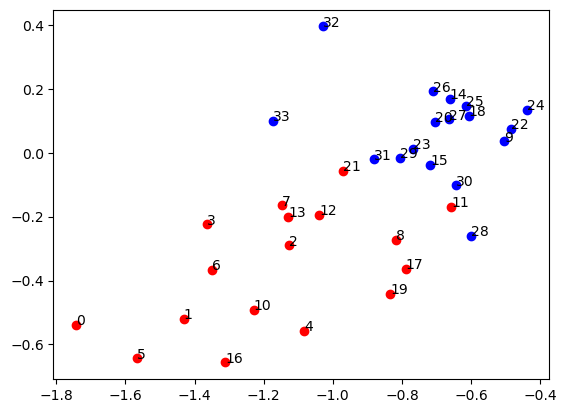

＝＝＝＝＝＝＝＝＝＝＝＝＝＝クラスタリング結果＝＝＝＝＝＝＝＝＝＝＝＝＝＝


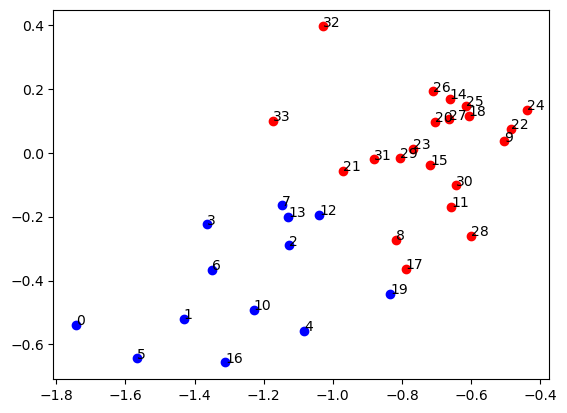

0.572538860103627


In [23]:

    # 埋め込み結果を可視化
    print("＝＝＝＝＝＝＝＝埋め込み結果（正解ラベルに基づいて色付け）＝＝＝＝＝＝＝＝＝")
    deepwalk.draw_embedded_vector(max_vec, TRUE_LABEL)
    # クラスタリング結果に基づいて可視化
    print("＝＝＝＝＝＝＝＝＝＝＝＝＝＝クラスタリング結果＝＝＝＝＝＝＝＝＝＝＝＝＝＝")
    deepwalk.draw_embedded_vector(max_vec, max_pred)
print(max(ARI_list))


In [21]:
#maxvecをcsvに出力
with open(f"max_vec_{data}_exec-{NUMBER_WALKS}_walklength-{WALK_LENGTH}_window-{WINDOW_SIZE}_method-{METHOD}.csv", "w") as f:
    for i in range(len(max_vec)):
        f.write(f"{max_vec[i][0]},{max_vec[i][1]}\n")
